In [ ]:
! python --version

Python 3.7.10


Parking Lot Occupancy Detection
Dataset: CNR Parking Dataset (http://cnrpark.it/)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import operator
import pickle
from keras.models import load_model
#from google.colab.patches import cv2_imshow

## CV 
use cv to get each parking space




###  cut the picture using opencv

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

basedir = 'd:\msda\data255\parking'
add_df = basedir+'\CNRPark+EXT.csv'
# sample one image address: 
add_img = r'D:\MSDA\data255\parking\FULL_IMAGE_1000x750\OVERCAST\2015-11-16\camera9\2015-11-16_1617.jpg'

In [ ]:
def getcoor(point, step):
    if point[0] < 75:
        point[0] = 75
    elif point[0] > 675:
        point[0] = 675
    if point[1] < 75:
        point[1] = 75
    elif point[1] > 925:
        point[1] = 925
    top, bottom = point[0]-step, point[0]+step
    left, right = point[1]-step, point[1]+step
    return top, bottom, left, right
def get_coor(df, point, step):
    top, bottom, left, right = getcoor(point, step)
    n = len(df)
    if n == 0:
        df.top = [top]
        df.bottom = [bottom]
        df.left = [left]
        df.right = [right]
    else:
        print(n)
        df.loc[n] = [top, bottom, left, right]
        '''        cam1.iloc[n, 0] = [top]
        cam1.iloc[n, 1] = [bottom]
        cam1.iloc[n, 2] = [left]
        cam1.iloc[n, 3] = [right]'''

def get_subplot(image, top, bottom, left, right):
    top, bottom, left, right = int(top), int(bottom), int(left), int(right)
    sub = image[top:bottom,left:right]
    return sub
def show_sub(image, point, step = 75):
    top, bottom, left, right = getcoor(point, step)
    sub = get_subplot(image, top, bottom, left, right)
    print(top, bottom, left, right)
    plt.imshow(sub)



In [ ]:
df1 = pd.read_csv(add_df)
df1.head()

C:\Users\xurui\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
0,A,20150703_0805,3,8,CNRPark/A/free/20150703_0805_1.jpg,5,7,0,1,S,2015,NaN
1,A,20150703_0810,3,8,CNRPark/A/free/20150703_0810_1.jpg,10,7,0,1,S,2015,NaN
2,A,20150703_0815,3,8,CNRPark/A/busy/20150703_0815_1.jpg,15,7,1,1,S,2015,0.0
3,A,20150703_0820,3,8,CNRPark/A/busy/20150703_0820_1.jpg,20,7,1,1,S,2015,0.0
4,A,20150703_0825,3,8,CNRPark/A/busy/20150703_0825_1.jpg,25,7,1,1,S,2015,0.0


In [ ]:
df = df1[12584:] # CNR-EXT
cam = []
for i in df['image_url']:
    cam.append(i.split('/')[4][-1])
df['camera'] = list(cam)
df

<ipython-input-226-38ba624ee77d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camera'] = list(cam)


,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
12584,1,2015-11-12_07.09,12,7,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera1/S_201...,9,11,0,184,S,2015,NaN
12585,2,2015-11-12_07.14,12,7,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera2/S_201...,14,11,0,184,S,2015,NaN
12586,1,2015-11-12_07.39,12,7,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera1/S_201...,39,11,0,184,S,2015,NaN
12587,2,2015-11-12_07.44,12,7,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera2/S_201...,44,11,0,184,S,2015,NaN
12588,1,2015-11-12_08.09,12,8,CNR-EXT/PATCHES/SUNNY/2015-11-12/camera1/S_201...,9,11,0,184,S,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
157544,9,2016-02-12_16.12,12,16,CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...,12,2,0,618,R,2016,NaN
157545,9,2016-02-12_16.42,12,16,CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...,42,2,0,618,R,2016,NaN
157546,9,2016-02-12_17.12,12,17,CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...,12,2,0,618,R,2016,NaN
157547,9,2016-02-12_17.42,12,17,CNR-EXT/PATCHES/RAINY/2016-02-12/camera9/R_201...,42,2,0,618,R,2016,NaN


In [ ]:
len(df.slot_id.unique()) # there are 164 parking spaces

164

In [ ]:
camdf = df.drop(columns=['datetime', 'day', 'hour','image_url','minute', 'month', 'occupancy', 'weather', 'year', 'occupant_changed'])
camdf.drop_duplicates(inplace = True)
slot = camdf['slot_id'].unique()

In [ ]:
camdf[camdf['camera'] == '9']
add_img = r'D:\MSDA\data255\parking\FULL_IMAGE_1000x750\OVERCAST\2015-11-16\camera9\2015-11-16_1617.jpg'

In [ ]:
import cv2
import numpy as np
# read the picture
img = cv2.imread(add_img)
a = []
b = []

def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        a.append(x)
        b.append(y)
        cv2.circle(img, (x, y), 1, (0, 0, 255), thickness=-1)
        cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    1.0, (0, 0, 0), thickness=1)
        cv2.imshow("image", img)
        print(x,y)
# manually mark each parking space

cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
cv2.imshow("image", img)
cv2.waitKey(0)
#print(a[0], b[0])


350 581
721 687
86 505
410 169
487 194
557 207
627 210
713 212
798 223
892 234
861 493
723 455
591 431
482 401
342 376
201 348


-1

In [ ]:
cam9 = pd.DataFrame(columns=['top', 'bottom', 'left', 'right'])

for i, j in zip(a, b):
    get_coor(cam9, [j, i], 75)
cam9

##### coordinates 

In [ ]:
cam1['slotID'] = list(camdf[camdf['camera'] == '1']['slot_id'])
cam1

,top,bottom,left,right,slotID
0,589,739,783,933,184
1,533,683,682,832,185
2,479,629,597,747,186
3,440,590,514,664,187
4,400,550,445,595,188
5,354,504,391,541,189
6,323,473,343,493,190
7,294,444,305,455,191
8,269,419,263,413,192
9,244,394,215,365,193


In [ ]:
cam2['slotID'] = list(camdf[camdf['camera'] == '2']['slot_id'])
cam2

,top,bottom,left,right,slotID
0,285,435,504,654,184
1,262,412,371,521,185
2,252,402,239,389,186
3,242,392,114,264,187
4,233,383,0,150,188
5,6,156,36,186,221
6,592,742,769,919,601
7,530,680,424,574,602
8,459,609,45,195,603


In [ ]:
cam3['slotID'] = list(camdf[camdf['camera'] == '3']['slot_id'])
cam3

,top,bottom,left,right,slotID
0,297,447,850,1000,187
1,317,467,733,883,188
2,331,481,594,744,189
3,349,499,459,609,190
4,362,512,318,468,191
5,383,533,149,299,192
6,386,536,32,182,193
7,114,264,398,548,221
8,134,284,311,461,222
9,133,283,222,372,223


In [ ]:
cam4['slotID'] = list(camdf[camdf['camera'] == '4']['slot_id'])
cam4

,top,bottom,left,right,slotID
0,374,524,772,922,192
1,358,508,634,784,193
2,349,499,490,640,194
3,347,497,361,511,195
4,344,494,228,378,196
5,134,284,850,1000,221
6,135,285,774,924,222
7,140,290,684,834,223
8,136,286,594,744,224
9,130,280,514,664,225


In [ ]:
cam5['slotID'] = list(camdf[camdf['camera'] == '5']['slot_id'])
cam5

,top,bottom,left,right,slotID
0,380,530,704,854,197
1,378,528,574,724,198
2,369,519,419,569,199
3,362,512,291,441,200
4,356,506,156,306,201
5,350,500,30,180,202
6,151,301,825,975,228
7,147,297,728,878,229
8,141,291,628,778,230
9,144,294,541,691,231


In [ ]:
cam6['slotID'] = list(camdf[camdf['camera'] == '6']['slot_id'])
cam6

,top,bottom,left,right,slotID
0,372,522,786,936,201
1,375,525,647,797,202
2,376,526,504,654,203
3,356,506,82,232,204
4,351,501,0,150,205
5,129,279,850,1000,232
6,131,281,762,912,233
7,128,278,665,815,234
8,126,276,569,719,235
9,133,283,481,631,236


In [ ]:
cam7['slotID'] = list(camdf[camdf['camera'] == '7']['slot_id'])
cam7

,top,bottom,left,right,slotID
0,333,483,850,1000,206
1,352,502,536,686,207
2,367,517,407,557,208
3,369,519,257,407,209
4,366,516,133,283,210
5,367,517,0,150,211
6,136,286,850,1000,238
7,145,295,786,936,239
8,141,291,693,843,240
9,147,297,620,770,241


In [ ]:
cam8['slotID'] = list(camdf[camdf['camera'] == '8']['slot_id'])
cam8 

,top,bottom,left,right,slotID
0,370,520,790,940,211
1,369,519,649,799,212
2,369,519,514,664,213
3,379,529,385,535,214
4,375,525,252,402,215
5,377,527,109,259,216
6,371,521,0,150,217
7,137,287,850,1000,244
8,141,291,816,966,245
9,141,291,735,885,246


In [ ]:
cam9['slotID'] = list(camdf[camdf['camera'] == '9']['slot_id'])
cam9

,top,bottom,left,right,slotID
0,413,563,787,937,217
1,329,479,404,554,218
2,290,440,234,384,219
3,272,422,127,277,220
4,153,303,818,968,253
5,138,288,725,875,254
6,130,280,638,788,255
7,133,283,562,712,256
8,132,282,481,631,257
9,117,267,416,566,258


In [ ]:
cam9.to_csv('cam9.csv')

##### show patches

prediction

(750, 1000, 3)

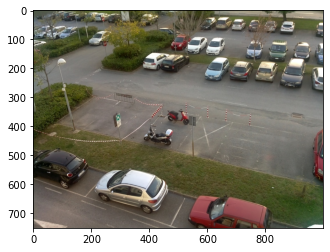

In [ ]:
add_img = r'D:\MSDA\data255\parking\FULL_IMAGE_1000x750\OVERCAST\2015-11-16\camera9\2015-11-16_1617.jpg'
image = cv2.imread(add_img)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#cv_show(image)
plt.imshow(image)
image.shape

In [ ]:
df_coor = pd.read_csv(basedir+'\coordinate69.csv')
df_coor

,Unnamed: 0,top,bottom,left,right,slotID,camera
0,0,589,739,783,933,184,1
1,1,533,683,682,832,185,1
2,2,479,629,597,747,186,1
3,3,440,590,514,664,187,1
4,4,400,550,445,595,188,1
...,...,...,...,...,...,...,...
315,23,20,90,611,681,330,9
316,24,20,90,562,632,331,9
317,25,600,750,567,717,616,9
318,26,548,698,290,440,617,9


In [ ]:
dfcam9 = df_coor[df_coor['camera']==9]

### Manually adjust the coordinates 

(750, 1000, 3)

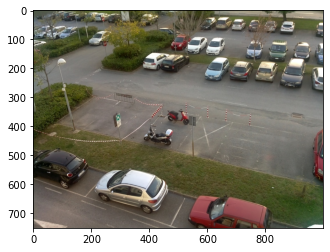

In [ ]:
img1add = r'D:\MSDA\data255\parking\FULL_IMAGE_1000x750\OVERCAST\2015-11-16\camera9\2015-11-16_0917.jpg'
dfcam9 = pd.read_csv(basedir+'\cam9.csv')
dfcam9
img1 = cv2.imread(img1add, cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
img1.shape

In [ ]:
n = 44
coor = df6.iloc[n, :4]
print(df6.iloc[n])
subplot = get_subplot(img1, coor[0], coor[1], coor[2], coor[3])
subplot.shape

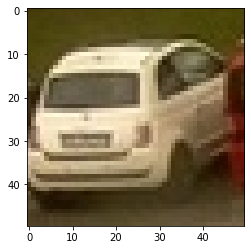

In [ ]:
t, b, l, r= 10, 10, 10, 10
a = get_subplot(img1, coor[0]+t, coor[1]-b, coor[2]+l, coor[3]-r)

In [ ]:
df6.iloc[n, :4] = [coor[0]+t, coor[1]-b, coor[2]+l, coor[3]-r]

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])
df.to_csv('coordinate_new.csv')

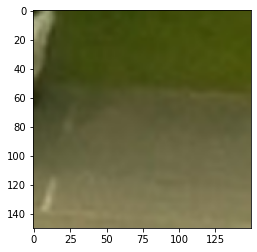

In [ ]:
img111 = cv2.resize(subplot, dsize = (150,150), interpolation=cv2.INTER_CUBIC)
plt.imshow(img111)

### create a video

In [ ]:
import os
import cv2
from colorama import Fore, Back, Style
import numpy as np
import sys
os.chdir(basedir)
class VideoCombiner(object):
    def __init__(self, img_dir):
        self.img_dir = img_dir

        if not os.path.exists(self.img_dir):
            print(Fore.RED + '=> Error: ' + '{} not exist.'.format(self.img_dir))
            exit(0)
        self._get_video_shape()
    def _get_video_shape(self):
        self.all_images = [os.path.join(self.img_dir, i) for i in os.listdir(self.img_dir)]
        sample_img = np.random.choice(self.all_images)
        if os.path.exists(sample_img):
            img = cv2.imread(sample_img)
            self.video_shape = img.shape
        else:
            print(Fore.RED + '=> Error: ' + '{} not found or open failed, try again.'.format(sample_img))
            exit(0)
    def combine(self, target_file='video.mp4'):
        size = (self.video_shape[1], self.video_shape[0])
        print('=> target video frame size: ', size)
        print('=> all {} frames to solve.'.format(len(self.all_images)))
        video_writer = cv2.VideoWriter(target_file, cv2.VideoWriter_fourcc(*'DIVX'), 24, size) # 24 fps/s
        i = 0
        print('=> Solving, be patient.')
        for img in self.all_images:
            img = cv2.imread(img, cv2.COLOR_BGR2RGB)
            i += 1
            # print('=> Solving: ', i)
            for i in range(20):
                video_writer.write(img)
        video_writer.release()
        print('Done!')
d = sys.argv[1]
combiner = VideoCombiner(r'D:\MSDA\data255\parking\FULL_IMAGE_1000x750\SUNNY\2015-11-12\camera9')
combiner.combine()

=> target video frame size:  (1000, 750)
=> all 22 frames to solve.
=> Solving, be patient.
Done!


### get images from video


In [ ]:

video_path = 'd:\\msda\\data255\\parking\\video.mp4'
# Read the video from specified path
cam = cv2.VideoCapture(video_path)
try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')
currentframe = 0
ret,frame = cam.read()
interval = 20 # capture 1 frame after every 20 frames
while(True):
    # reading from frame
    for i in range(interval):
        ret,frame = cam.read()
        currentframe +=1
    if ret:
        # if video is still left continue creating images
        name = './data/parking' + str(int(7+currentframe/40)) + '.jpg'
        print ('Creating...' + name)
        # writing the extracted images
        cv2.imwrite(name, frame)
        # increasing counter so that it will show how many frames are created
        currentframe += 1
    else:
        break
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../data/parking7.jpg
Creating..../data/parking8.jpg
Creating..../data/parking8.jpg
Creating..../data/parking9.jpg
Creating..../data/parking9.jpg
Creating..../data/parking10.jpg
Creating..../data/parking10.jpg
Creating..../data/parking11.jpg
Creating..../data/parking11.jpg
Creating..../data/parking12.jpg
Creating..../data/parking12.jpg
Creating..../data/parking13.jpg
Creating..../data/parking13.jpg
Creating..../data/parking14.jpg
Creating..../data/parking14.jpg
Creating..../data/parking15.jpg
Creating..../data/parking15.jpg
Creating..../data/parking16.jpg
Creating..../data/parking16.jpg
Creating..../data/parking17.jpg
Creating..../data/parking18.jpg


In [ ]:
os.getcwd()

'd:\\msda\\data255\\parking'

### Show the results

In [ ]:
import glob
list_img = sorted(glob.glob('./data/*.jpg'), key=os.path.getmtime)
n_img = 0
n_p = len(dfcam9)

In [ ]:
n_img = 1

./data\parking8.jpg


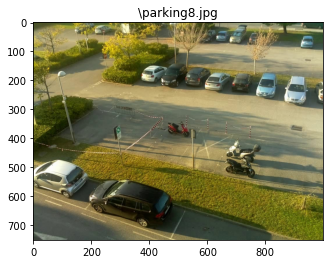

In [ ]:
patches = []
img = cv2.imread(list_img[n_img], cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(list_img[n_img])
plt.imshow(img)
plt.title(list_img[n_img].split('data')[-1])
for i in range(n_p-1):
    coor = dfcam9.iloc[i,1:5]
    subplot = get_subplot(img, coor[0], coor[1], coor[2], coor[3])
    subplot = cv2.resize(subplot, dsize = (150,150), interpolation=cv2.INTER_CUBIC)
    patches.append(subplot)
id = list(dfcam9.slotID)
n_img +=1

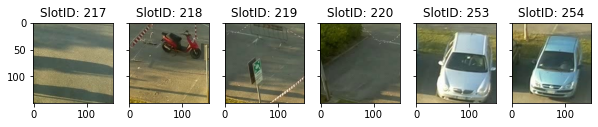

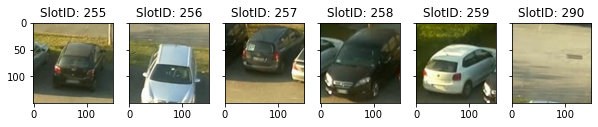

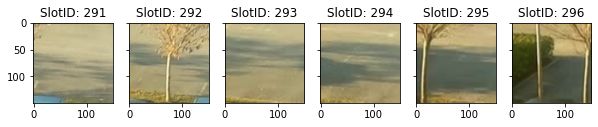

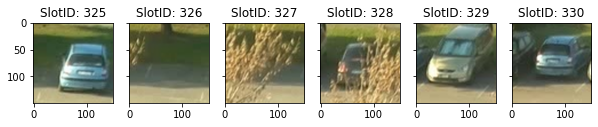

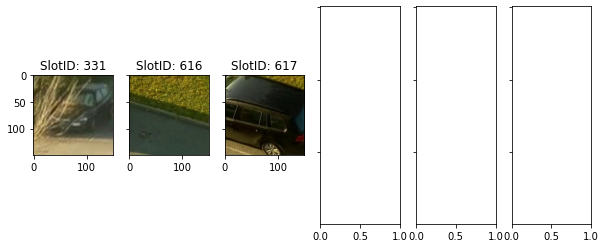

In [ ]:
n = 0
try:
    for i in range(int(n_p/6+1)):
        f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True)
        f.set_figwidth(10)
        ax1.imshow(patches[n])
        ax1.set_title('SlotID: '+str(id[n]))
        n+=1
        ax2.imshow(patches[n])
        ax2.set_title('SlotID: '+str(id[n]))
        n+=1
        ax3.imshow(patches[n])
        ax3.set_title('SlotID: '+str(id[n]))
        n+=1
        ax4.imshow(patches[n])
        ax4.set_title('SlotID: '+str(id[n]))
        n+=1
        ax5.imshow(patches[n])
        ax5.set_title('SlotID: '+str(id[n]))
        n+=1
        ax6.imshow(patches[n])
        ax6.set_title('SlotID: '+str(id[n]))
        n+=1
except:
    pass


In [ ]:
patches = np.array(patches)/255
np.shape(patches)

(27, 150, 150, 3)

In [ ]:
from keras.models import load_model
model = load_model(basedir + r'\model\best_model.hdf5')
df = pd.DataFrame(model.predict(patches), columns=['Pred'])
df['Prediction'] = [1 if i >0.2 else 0 for i in df['Pred']]
df

,Pred,Prediction
0,0.999998,1
1,0.230060,1
2,0.006056,0
3,0.003180,0
4,1.000000,1
5,0.999578,1
6,0.995017,1
7,1.000000,1
8,0.999920,1
9,0.968293,1


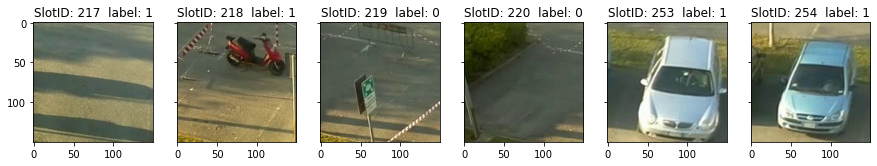

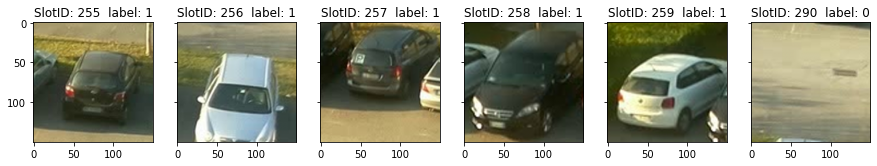

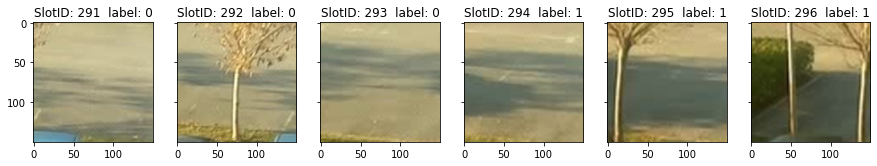

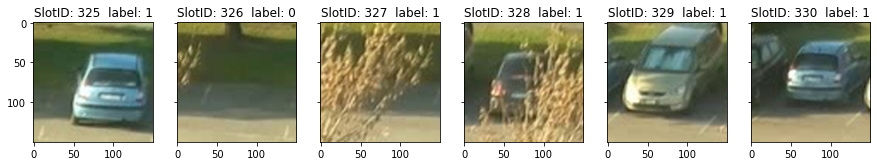

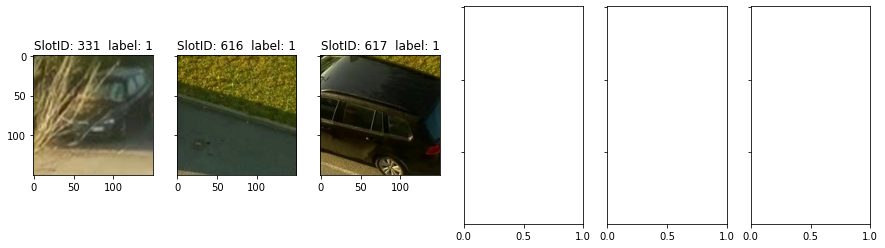

In [ ]:
n = 0
try:
    for i in range(int(n_p/6+1)):
        f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True)
        f.set_figwidth(15)
        ax1.imshow(patches[n])
        ax1.set_title('SlotID: '+str(id[n])+ '  label: '+str(df['Prediction'][n]))
        n+=1
        ax2.imshow(patches[n])
        ax2.set_title('SlotID: '+str(id[n])+ '  label: '+str(df['Prediction'][n]))
        n+=1
        ax3.imshow(patches[n])
        ax3.set_title('SlotID: '+str(id[n])+ '  label: '+str(df['Prediction'][n]))
        n+=1
        ax4.imshow(patches[n])
        ax4.set_title('SlotID: '+str(id[n])+ '  label: '+str(df['Prediction'][n]))
        n+=1
        ax5.imshow(patches[n])
        ax5.set_title('SlotID: '+str(id[n])+ '  label: '+str(df['Prediction'][n]))
        n+=1
        ax6.imshow(patches[n])
        ax6.set_title('SlotID: '+str(id[n])+ '  label: '+str(df['Prediction'][n]))
        n+=1
except:
    pass

In [ ]:
# False P
FP = [int(i) for i in '0 6 1 0 0 0 0 0 0 0 0 0'.split(' ')]
# False N
FN = [int(i) for i in '1 0 0 0 0 0 0 0 0 0 8 14'.split(' ')]

TP = [int(i) for i in '6 14 25 25 25 24 24 24 25 23 12 6'.split(' ')]

TN = [int(i) for i in '20 7 1 2 2 3 3 3 2 4 7 7'.split(' ')]


In [ ]:
print(sum(FP), sum(FN), sum(TP), sum(TN))

7 23 233 61


In [ ]:
(233+61)/(233+61+23+7)

0.9074074074074074

In [ ]:
233+61+23+7

324